# How to Optimize your holes

In the realm of industrial manufacturing, the drilling problem arises from the necessity to create precise holes in various surfaces using drilling machines. While the theoretical drilling time for each individual hole remains constant, the cumulative time to drill all holes can be optimized. This presents an intriguing optimization challenge: how can we minimize the total drilling time?

At its core, the drilling problem is an optimization problem that requires algorithmic solutions, as there is no straightforward mathematical function to model, differentiate, and solve directly. The objective is to determine the most efficient sequence for the drilling machine to follow, minimizing the total distance traveled between consecutive drilling points.

Considering that the machine moves at a constant velocity across the plane, our goal is to find the permutation of drilling points that results in the minimum sum of distances between each point and its successor. This problem can be visualized in a two-dimensional plane (R²), where each point represents a drilling location.

To tackle this problem, we employ various algorithmic strategies, including but not limited to:

- Heuristic Methods: Approaches like the Nearest Neighbor and Genetic Algorithms that provide good solutions within reasonable timeframes.
- Exact Algorithms: Methods such as the Traveling Salesman Problem (TSP) solvers that guarantee the optimal solution but may be computationally intensive.

In this notebook, we will explore and exact algorithm to adress this problem and find exact solutions.
Lets start explaining a simple example to make the problem more illustrative.



## Simple example

Imagine you are the owner of a piece of land (a dream come true!) and during a study, you discover that there are four points on this land where petroleum can be accessed using a drilling machine. The challenge now is to determine the optimal path for the drilling machine to take to extract the petroleum efficiently.

This problem can be likened to a simpler scenario: planning a trip to four different cities. The objective is to determine the best route that minimizes the total travel distance.

In both scenarios, the best path is the one that minimizes the total distance traveled. This problem is a classic example of an optimization problem that can be approached algorithmically.

To illustrate this, let's plot these four points on a plane and visualize the potential paths using Python with Matplotlib and Seaborn.

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import warnings
import itertools
import random
import math
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")


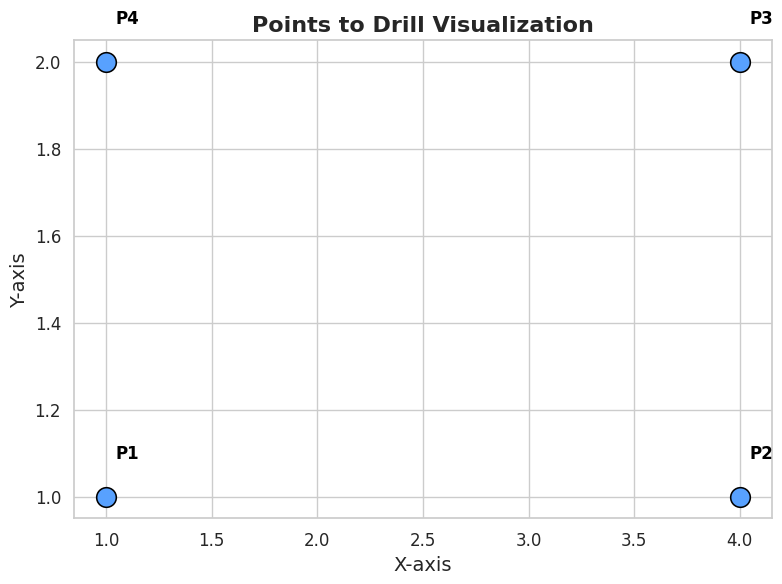

In [2]:
points = np.array([
    [1, 1],
    [4, 1],
    [4, 2],
    [1, 2]
])
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.scatterplot(x=points[:, 0], y=points[:, 1], s=200, color='#58A1FE', edgecolor='black')

for i, (x, y) in enumerate(points):
    plt.text(x + 0.1, y + 0.1, f'P{i+1}', fontsize=12, weight='bold', ha='center', va='center', color='black')

plt.title('Points to Drill Visualization', fontsize=16, weight='bold')
plt.xlabel('X-axis', fontsize=14)
plt.ylabel('Y-axis', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.show()

In this plot, it's easy to see the solution to the problem. Starting at any point, we can follow a pattern: move vertically to the next point, then horizontally to the adjacent point, and finally vertically again (this keeping in mind that the machine only moves horizontaly and verticaly). but what if we have a lot of points that dont make an exact geometrical figure.

In [3]:
def generate_random_points(n, r=(0, 100), seed=None):
    if seed is not None:
        random.seed(seed)
    array =[[random.uniform(*r), random.uniform(*r)] for _ in range(n)]
    return np.array(array)
random_points = generate_random_points(7, seed= 2002)
random_points

array([[72.74911404, 50.02834374],
       [77.75030705, 56.40572467],
       [88.05074263, 88.48788015],
       [59.83665493,  0.16848155],
       [26.7221935 , 51.25473612],
       [99.35839107,  5.23870389],
       [77.34811631, 87.72849765]])

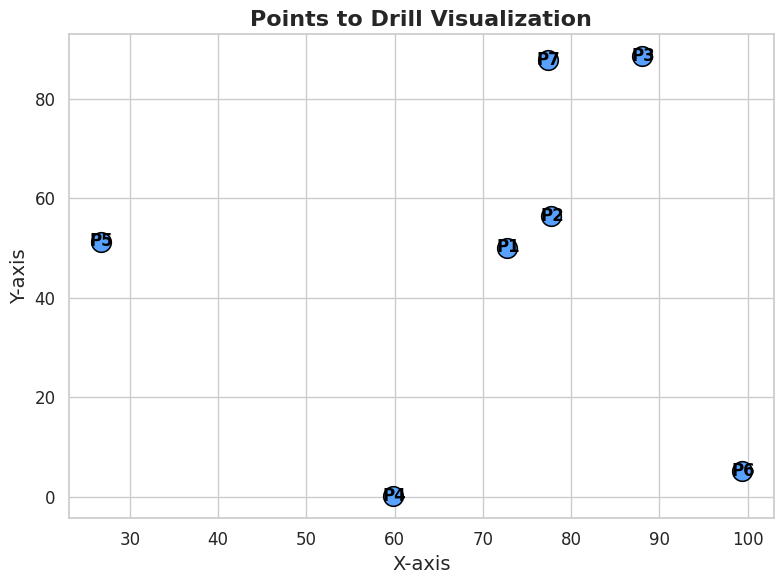

In [4]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.scatterplot(x=random_points[:, 0], y=random_points[:, 1], s=200, color='#58A1FE', edgecolor='black')

for i, (x, y) in enumerate(random_points):
    plt.text(x + 0.1, y + 0.1, f'P{i+1}', fontsize=12, weight='bold', ha='center', va='center', color='black')

plt.title('Points to Drill Visualization', fontsize=16, weight='bold')
plt.xlabel('X-axis', fontsize=14)
plt.ylabel('Y-axis', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.show()

## General algorithm

First we should define a function that calculates the distance from one point to another we will call this function distance_p1_p2.

In [5]:
def distance_p1_p2(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
distance_p1_p2(random_points[0], random_points[1])

8.104499930112723

Now lets see how the algorithm works, what we want is given an array of n points we should find the permutation where the sum of the consecutive points distance is minimun, so the biggest problem of these algorithm is to make the permutations.Given an array of n points, we need to find a permutation that minimizes the sum of the distances between consecutive points. This is a common problem in fields such as logistics and network design, where finding the most efficient route or connection sequence is crucial.

Approach
Understanding Permutations: A permutation is a reordering of the elements in a given set. For n points, there are n! possible permutations. Our task is to evaluate these permutations to find the one with the minimum total distance.
 

In [6]:
def path_enumeration(points):
    # Find number of points
    n = len(points)
    
    # Best permutation
    best_path = []
    
    # Set best cost
    best_cost = float('inf')
    
    # Define cost function
    def cost(permutation):
        total_cost = 0
        for i in range(len(permutation) - 1):
            total_cost += distance_p1_p2(points[permutation[i]], points[permutation[i + 1]])
        return total_cost
    
    # Enumerate all permutations of point indices
    for perm in itertools.permutations(range(n)):
        current_cost = cost(perm)
        if current_cost < best_cost:
            best_cost = current_cost
            best_path = perm
    
    # Format the path as "p1 to p2 to p3 to p4"
    formatted_path = ' to '.join(f'P{i+1}' for i in best_path)
    
    return best_path, formatted_path, best_cost

In [7]:
best_path_indices, best_path, best_cost = path_enumeration(random_points)
print("Best Path:", best_path)
print("Best Cost:", best_cost)

Best Path: P3 to P7 to P2 to P1 to P5 to P4 to P6
Best Cost: 196.92826904940853


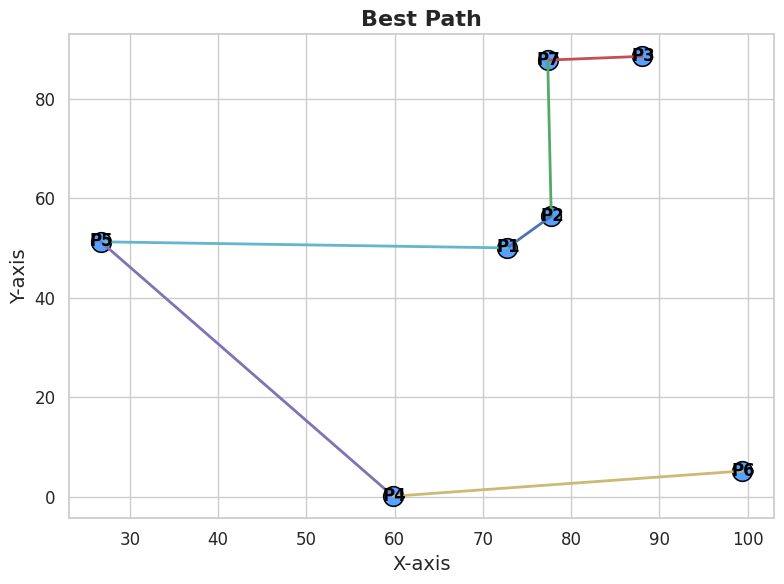

In [8]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Plot points
sns.scatterplot(x=random_points[:, 0], y=random_points[:, 1], s=200, color='#58A1FE', edgecolor='black')

# Plot lines according to the best path
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # List of colors for the lines
for i in range(len(best_path_indices) - 1):
    p1 = random_points[best_path_indices[i]]
    p2 = random_points[best_path_indices[i + 1]]
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color=colors[i % len(colors)], linewidth=2)

# Annotate points
for i, (x, y) in enumerate(random_points):
    plt.text(x + 0.1, y + 0.1, f'P{i+1}', fontsize=12, weight='bold', ha='center', va='center', color='black')

plt.title('Best Path', fontsize=16, weight='bold')
plt.xlabel('X-axis', fontsize=14)
plt.ylabel('Y-axis', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.show()

## Example with a lot of holes

In real life, the drilling problem can be extremely useful for optimizing the automation of machines that drill holes in PCB (Printed Circuit Board) boards for electric circuits. Given the positions where the components go and the number of circuits that need to be connected, we can use this approach to automate the machine that drills the holes.

While this optimization may seem redundant for a small number of PCB boards, such as 20, it becomes crucial when manufacturing millions or even billions of boards. Optimizing the drilling process can significantly reduce the time required for production, leading to increased efficiency and cost savings. This approach can be applied to any situation where a precise sequence of operations is needed to minimize time and maximize efficiency.

In [9]:
PCB_holes = generate_random_points(10, seed= 1010)
best_path_indices, best_path, best_cost = path_enumeration(PCB_holes)
print("Best Path:", best_path)
print("Best Cost:", best_cost)

Best Path: P1 to P4 to P5 to P10 to P8 to P2 to P3 to P6 to P9 to P7
Best Cost: 250.14857872153158


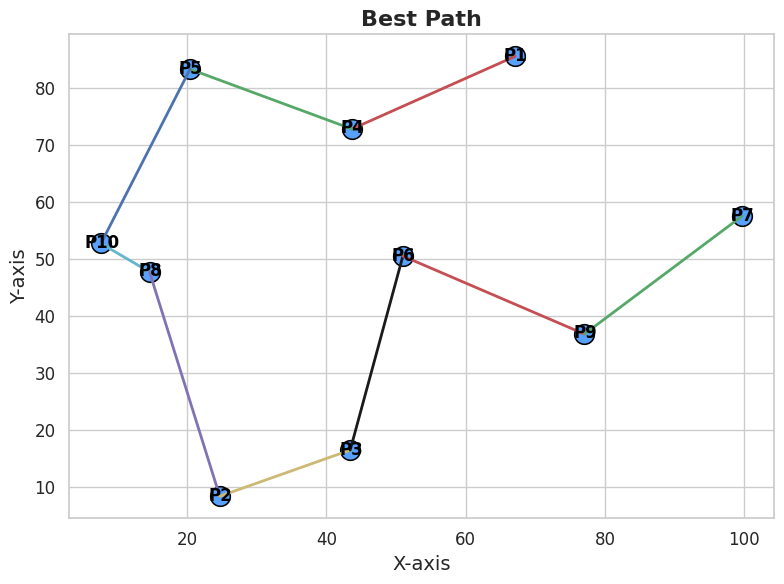

In [10]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Plot points
sns.scatterplot(x=PCB_holes[:, 0], y=PCB_holes[:, 1], s=200, color='#58A1FE', edgecolor='black')

# Plot lines according to the best path
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # List of colors for the lines
for i in range(len(best_path_indices) - 1):
    p1 = PCB_holes[best_path_indices[i]]
    p2 = PCB_holes[best_path_indices[i + 1]]
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color=colors[i % len(colors)], linewidth=2)

# Annotate points
for i, (x, y) in enumerate(PCB_holes):
    plt.text(x + 0.1, y + 0.1, f'P{i+1}', fontsize=12, weight='bold', ha='center', va='center', color='black')

plt.title('Best Path', fontsize=16, weight='bold')
plt.xlabel('X-axis', fontsize=14)
plt.ylabel('Y-axis', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.show()

## Conclusion

In this notebook, we explored the problem of finding the optimal route among a set of randomly generated points. While this approach can be highly beneficial for optimizing the automation of machines that drill holes in PCB (Printed Circuit Board) boards for electric circuits, it is important to note a significant limitation: the time complexity of the algorithm.

Scalability Issue
The primary issue with the algorithm presented is its scalability. As the number of holes increases, the time required to compute the optimal path grows factorially. This is because the algorithm evaluates all possible permutations of the points to find the optimal solution, which becomes impractical for a large number of points due to the combinatorial explosion.

Alternative Approaches
To address this scalability issue, there are several other approaches that can be considered:

Heuristic Algorithms: Methods such as the Nearest Neighbor, Minimum Spanning Tree, or Christofides' algorithm can provide good solutions in a fraction of the time.
Metaheuristic Algorithms: Techniques like Genetic Algorithms, Simulated Annealing, and Ant Colony Optimization can offer near-optimal solutions with significantly reduced computational requirements.
Dynamic Programming: The Held-Karp algorithm, although still exponential, reduces the problem size compared to naive permutation-based approaches.
Final Thoughts
Despite the limitations, the approach demonstrated here provides a foundational understanding of the traveling salesman problem and its applications to real-world scenarios, such as optimizing the drilling process in PCB manufacturing. By improving these optimization techniques, we can enhance automation efficiency and reduce production times in various industries.

Thank you for reading this notebook. I invite you to explore my other works, where I delve deeper into optimization problems, machine learning, and data science applications. Your feedback and engagement are highly appreciated.